context: Various input matrices of size B*D where B is not constant. We also have a reference matrix of N*D. Among all input matrices, find k rows that are nearest to any of the rows in the reference matrix.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
mean1 = [5, 5]
cov1 = [[0.5,0],  [0,0.5]]
mean2 = [2, 2]
cov2 = [[2,0],  [0,2]]
mean3 = [2, 8]
cov3 = [[2,0],  [0,2]]

In [33]:
ref = np.random.multivariate_normal(mean1, cov1, 10)

In [34]:
a1 = np.random.multivariate_normal(mean2, cov2, 13)
a2 = np.random.multivariate_normal(mean3, cov3, 34)

In [35]:
pack = [a1, a2]

In [36]:
def L2 (X, Y):
    res = np.zeros((len(X), len(Y)))
    for i in np.arange(len(X)):
        for j in np.arange(len(Y)):
            res[i, j] = np.sqrt(np.sum((X[i]-Y[j])**2.0))
    return res

In [37]:
def cityblock (X,Y):
    pass

In [38]:
class KNN:
    
    def __init__ (self, dfn, k, reference):
        self.k = k
        self.dfn = dfn
        self.k_dist = np.ones(k)*np.inf
        self.reference = reference
        self.k_nearest = np.zeros((k, len(reference[0])))
    
    def distance_function(self, X,Y):
        if (self.dfn == "L2"):
            return L2(X,Y)
        if (self.dfn == "cityblock"):
            return cityblock(X,Y)
    
    def observe(self, X):
        self.dist_x = self.distance_function(X, self.reference)
        row_min = np.array([min(self.dist_x[i, ]) for i in np.arange(len(self.dist_x))])
        min_k = np.sort(row_min)[:3]
        min_k_coord = np.array([np.concatenate(np.where(self.dist_x == i)) for i in min_k][:3])
        print(min_k, "\n",min_k_coord)
        #min_k_coord is the coordinate of the k smallest distance in the distance matrix
        for i in np.arange(len(min_k)): #compare the distance of the current query to the distance of previous queries
            if min_k[i] < np.max(self.k_dist):
                self.k_dist[-1] = min_k[i]
                temp_order = np.argsort(self.k_dist)
                self.k_dist = np.sort(self.k_dist)
                self.k_nearest[-1] = X[min_k_coord[i][0],]
                self.k_nearest = self.k_nearest[temp_order,]

In [39]:
#implement the classifier
knn = KNN("L2", 3, ref)
for i in pack:
    knn.observe(i)
nearst = knn.k_nearest
nearst

[1.6946527  2.26213137 2.62180269] 
 [[2 3]
 [5 3]
 [4 3]]
[1.14069258 1.14330465 1.7569555 ] 
 [[18  4]
 [24  8]
 [26  8]]


array([[3.64105684, 5.2162909 ],
       [4.16255619, 6.70735899],
       [3.51271287, 2.97702678]])

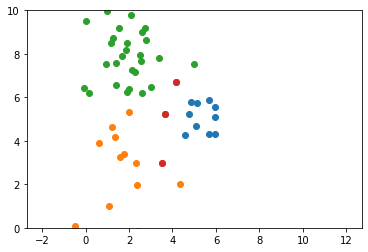

In [40]:
plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.scatter(ref.T[0], ref.T[1])
plt.scatter(a1.T[0], a1.T[1], c = "C1")
plt.scatter(a2.T[0], a2.T[1], c = "C2")
plt.scatter(nearst.T[0], nearst.T[1], c= "C3")